# Formative Assessment

### The goal

The goal of the assignment is to predict active power of a wind turbine using several input features. The data comes from a wind farm in France, [La Haute Borne Data (2013-2016)](https://opendata-renewables.engie.com/explore/dataset/la-haute-borne-data-2013-2016/table/?dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6ImxhLWhhdXRlLWJvcm5lLWRhdGEtMjAxMy0yMDE2Iiwib3B0aW9ucyI6e319LCJjaGFydHMiOlt7InR5cGUiOiJsaW5lIiwiZnVuYyI6IkFWRyIsInlBeGlzIjoiYmFfYXZnIiwic2NpZW50aWZpY0Rpc3BsYXkiOnRydWUsImNvbG9yIjoiIzY2YzJhNSJ9XSwieEF4aXMiOiJkYXRlX3RpbWUiLCJtYXhwb2ludHMiOiIiLCJ0aW1lc2NhbGUiOiJ5ZWFyIiwic29ydCI6IiJ9XX0%3D). A total of 139 features are included in the dataset, with several measures of the same feature. For instance, the active power feature is split into the following measurements: `P_min, P_max, P_avg, P_std`. 

The overall tasks are the following:

1. Use a random forest regressor to predict power output. 
2. Perform dimension reduction using PCA.
2. Perform cross validation to determine how well the model generalises. 
3. Determine the importance of the features.
4. Determine the performance of the models as well.

The notebook will guide you as to how to go about fulfilling these overall tasks by doing other smaller subtasks.

Note that the dataset is very large, with 139 columns, so using a bit of domain knowledge we identified the following features that could be using in predicting wind turbine power output. Add to the feature subset as you build the model.



### Load the data

Import the necessary libraries and load the data. Once loaded, investigate the data. There are two files: `data_description.csv` lists the variables or features of the dataset. The file `wind-data.csv` contains the data (`wind-data-truncated.csv` if downloaded from the LMS, due to file size limits).

In [121]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score


%matplotlib inline

Load both the `data_description.csv` and `wind-data.csv` files.

In [5]:
data1=pd.read_csv('data_description.csv',sep=';', index_col=0)

data1.head()

,Variable_long_name,Unit_long_name,Comment
Variable_name,,,
Va2,Vane_position_2,deg,Second wind vane on the nacelle
Ws2,Wind_speed_2,m/s,Second anemometer on the nacelle
Ws,Wind_speed,m/s,Average wind speed
Wa_c,Absolute_wind_direction_corrected,deg,NaN
Na_c,Nacelle_angle_corrected,deg,NaN


In [112]:
data2=pd.read_csv('wind-data-truncated.csv', index_col=0, parse_dates=['Date_time'])

data2.head()

,Wind_turbine_name,Date_time,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,...,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
804808,R80711,2013-04-06 14:20:00,-0.940000,-0.950000,-0.940000,0.0,10.59,10.000000,11.0,0.41,...,NaN,NaN,358.870000,NaN,NaN,NaN,351.670010,NaN,NaN,NaN
732424,R80711,2015-12-22 14:30:00,-0.990000,-0.990000,-0.990000,0.0,17.00,17.000000,17.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
312987,R80711,2016-03-20 20:40:00,-0.990000,-0.990000,-0.990000,0.0,12.88,12.000000,13.0,0.25,...,NaN,NaN,44.849998,NaN,NaN,NaN,44.849998,NaN,NaN,NaN
68152,R80711,2016-01-09 01:00:00,45.000000,45.000000,45.000000,0.0,12.95,12.000000,13.0,0.20,...,NaN,NaN,243.020000,NaN,NaN,NaN,243.020000,NaN,NaN,NaN
231878,R80721,2014-12-14 13:20:00,44.990002,44.990002,44.990002,0.0,16.99,16.110001,17.0,0.07,...,NaN,NaN,195.060000,NaN,NaN,NaN,308.239990,NaN,NaN,NaN


__Helpful hint__: Load the data into a dataframe. Use the `parse_dates=['Date_time']` argument in the `read_csv` function in order to display dates in later plots.

### Explore the data

Once you've loaded the data into a pandas dataframe, explore the data. You may start by generating summary statistics, identifying any missing values, and filling in missing values. Generate visualizations of the features as a way to start understanding the distribution of the data.

In [7]:
data1.describe()

,Variable_long_name,Unit_long_name,Comment
count,34,32,7
unique,34,10,7
top,Absolute_wind_direction,deg_C,Second wind vane on the nacelle
freq,1,11,1


In [81]:
data2.describe()

,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,...,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std,aboveAVG
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.0,25000.000000,25000.0,25000.0,25000.0,25000.000000,25000.0,25000.0,25000.0,25000.000000
mean,13.832199,12.739340,15.280860,0.856264,19.210131,19.017220,19.428465,0.105331,1049.495712,938.247670,...,0.0,171.399601,0.0,0.0,0.0,172.278200,0.0,0.0,0.0,0.341840
std,28.233084,28.061846,28.784217,3.863646,6.328794,6.336863,6.336022,0.157067,629.678117,595.881005,...,0.0,100.048152,0.0,0.0,0.0,100.286363,0.0,0.0,0.0,0.474336
min,-1.050000,-23.040001,-1.050000,0.000000,0.000000,0.000000,0.000000,0.000000,-574.880000,-574.919980,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
25%,-0.990000,-1.000000,-0.990000,0.000000,14.000000,14.000000,14.870000,0.000000,846.422485,153.192507,...,0.0,69.757502,0.0,0.0,0.0,69.589998,0.0,0.0,0.0,0.000000
50%,-0.970000,-0.990000,-0.500000,0.000000,19.000000,19.000000,19.000000,0.000000,1176.650000,1028.545050,...,0.0,189.945000,0.0,0.0,0.0,191.725000,0.0,0.0,0.0,0.000000
75%,6.225000,-0.490000,24.365000,0.130000,24.000000,24.000000,24.000000,0.200000,1562.932550,1364.120000,...,0.0,245.910000,0.0,0.0,0.0,247.399990,0.0,0.0,0.0,1.000000
max,117.130000,117.130000,161.770000,45.220001,39.000000,39.000000,39.000000,0.940000,1805.770000,1800.720000,...,0.0,359.950010,0.0,0.0,0.0,359.950010,0.0,0.0,0.0,1.000000


In [71]:
#Looking at data1 "Data description"

data1.isnull().sum()

Variable_long_name     0
Unit_long_name         2
Comment               27
dtype: int64

In [37]:
#Remove relevant missing values
d1= data1['Unit_long_name']
d1.dropna(inplace=True)
d1.describe()

count        32
unique       10
top       deg_C
freq         11
Name: Unit_long_name, dtype: object

In [108]:
#Looking at data2 "Wind Data"

data2.isnull().sum()

Ba_avg        0
Ba_min        0
Ba_max        0
Ba_std        0
Rt_avg        0
Rt_min        0
Rt_max        0
Rt_std        0
DCs_avg       0
DCs_min       0
DCs_max       0
DCs_std       0
Cm_avg        0
Cm_min        0
Cm_max        0
Cm_std        0
P_avg         0
P_min         0
P_max         0
P_std         0
Q_avg         0
Q_min         0
Q_max         0
Q_std         0
S_avg         0
S_min         0
S_max         0
S_std         0
Cosphi_avg    0
Cosphi_min    0
             ..
Nf_std        0
Nu_avg        0
Nu_min        0
Nu_max        0
Nu_std        0
Rs_avg        0
Rs_min        0
Rs_max        0
Rs_std        0
Rbt_avg       0
Rbt_min       0
Rbt_max       0
Rbt_std       0
Rm_avg        0
Rm_min        0
Rm_max        0
Rm_std        0
Pas_avg       0
Pas_min       0
Pas_max       0
Pas_std       0
Wa_c_avg      0
Wa_c_min      0
Wa_c_max      0
Wa_c_std      0
Na_c_avg      0
Na_c_min      0
Na_c_max      0
Na_c_std      0
aboveAVG      0
Length: 137, dtype: int6

Because we are investigating power output, the active power feature is given by the following features in  the dataset: `P_avg, P_min, P_max, P_std`. Decide on which active power feature to use (hint: perhaps the average or maximum would be a good place to start). Begin by using the function `groupby` to determine how many turbines there are in the dataset. The dataset is huge, so in order to visualize trends in power output, a simpler way would be to look at monthly trends in the data.

There is a wind turbine with `Wind_turbine_name` R80711. Use this column and determine the trend for the month of January.

In [55]:
turbines = data2.groupby('Wind_turbine_name') 
turbines.count()

,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,...,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
Wind_turbine_name,,,,,,,,,,,,,,,,,,,,,
R80711,6226,6226,6226,6226,6226,6226,6226,6226,6226,6226,...,6226,6226,6226,6226,6226,6226,6226,6226,6226,6226
R80721,6257,6257,6257,6257,6257,6257,6257,6257,6257,6257,...,6257,6257,6257,6257,6257,6257,6257,6257,6257,6257
R80736,6246,6246,6246,6246,6246,6246,6246,6246,6246,6246,...,6246,6246,6246,6246,6246,6246,6246,6246,6246,6246
R80790,6271,6271,6271,6271,6271,6271,6271,6271,6271,6271,...,6271,6271,6271,6271,6271,6271,6271,6271,6271,6271


In [41]:
len(turbines) #There are 4 types of turbine in the data

4

In [14]:
#To plot turbine R80711, transpose the data fram in order to plot the turbine as a column

#data2 = data2.T 
#data2.head()


In [46]:
#selecting a date range
month = data2.loc[('2013-01-01'<data2['Date_time']) & (data2['Date_time']<'2013-01-30')]
month1 = data2.loc[('2014-01-01'<data2['Date_time']) & (data2['Date_time']<'2014-01-30')]
month2= data2.loc[('2015-01-01'<data2['Date_time']) & (data2['Date_time']<'2015-01-30')]
month3 = data2.loc[('2016-01-01'<data2['Date_time']) & (data2['Date_time']<'2016-01-30')]
#month4 = data2.loc[('2012-01-01'<data2['Date_time']) & (data2['Date_time']<'2012-01-30')]

<Figure size 1080x432 with 0 Axes>

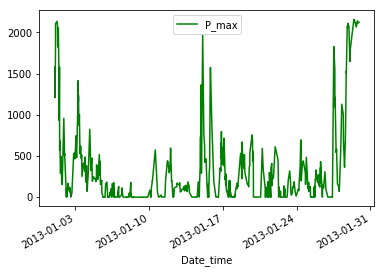

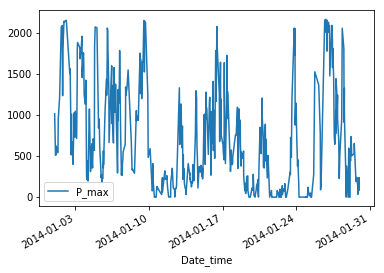

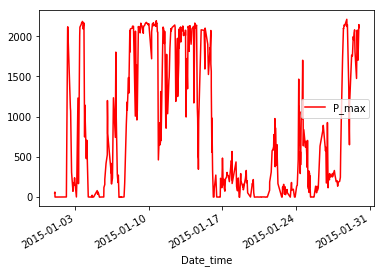

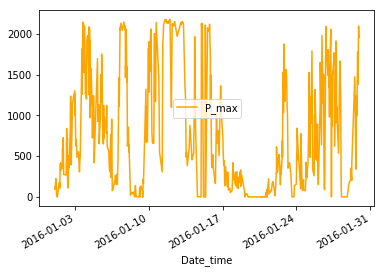

In [47]:
fig = plt.figure(figsize=(15, 6))


month.plot(x='Date_time', y='P_max',c='green')
month1.plot(x='Date_time', y='P_max')
month2.plot(x='Date_time', y='P_max', c='red')
month3.plot(x='Date_time', y='P_max', c='orange')
#month4.plot(x='Date_time', y='P_max', c='orange')

### Find missing values

A dataset with missing values will not be usable for fitting and testing a model. Fill in missing values in a way suitable for the model.

In [110]:
#Replace missing values with 0 and check if indeed we have no missing values
d2=data2
d2.fillna(0, inplace=True)
d2.isnull().sum().sum()

0

### Split dataset into predictor and target matrices

In [85]:
# Generate new class attribute. Is P max and P avg above average? 1= yes / 0 = no
data2['aboveAVG'] = np.where((data2['P_max'] + data2['P_min'])>=(data2['P_max'].mean() + data2['P_min'].mean()), 1, 0)

print(data2['aboveAVG'])

804808    1
732424    1
312987    0
68152     0
231878    0
358331    1
103717    1
243156    0
588295    0
321189    1
604953    0
294112    0
239505    1
443389    1
461924    1
686036    0
193847    0
260943    0
253948    0
839760    0
339926    1
474994    0
514081    0
98198     0
613991    1
117084    0
367290    0
605010    0
254785    0
596705    0
         ..
513380    1
614196    0
611066    0
432377    0
804755    1
554336    0
379515    0
419108    1
453626    0
302710    1
45434     0
720863    0
759527    1
86740     0
562175    1
738888    1
829512    0
613919    0
66064     1
309843    0
371323    1
199539    0
768294    1
157270    0
645905    0
343924    0
256691    0
545539    1
452358    1
563047    0
Name: aboveAVG, Length: 25000, dtype: int32


In [86]:
# Values of target
y = data2['aboveAVG'].values

# Values of attributes
data = data2.drop(['P_max', 'P_min', 'aboveAVG'], axis=1)
X = data2.values

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Dimension Reduction with PCA

The dataset we have it quite huge. We need to select features to use for our analysis of the active power. To discover the principal features, we can principal component analysis. First split the data into predictor and target variables. PCA allows you to reduce the number of you predictors, and to decorrelate them especially for features that have a direct relationship like apparent power, reactive power and active power.

In [113]:
#remove features that are not relevant for machine learning:

del data2['Date_time']

del data2['Wind_turbine_name']

In [87]:
#getting number of features

number_features = len(data2.columns)

In [88]:
pca=PCA(n_components=number_features)                                    
pca.fit(X) 

PCA(copy=True, iterated_power='auto', n_components=137, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### Plot the variance

In [89]:
PCA(copy=True, n_components=None, whiten=False)
pca.components_

array([[-2.39848687e-03, -2.33657883e-03, -2.33021759e-03, ...,
        -0.00000000e+00, -0.00000000e+00,  6.37769774e-05],
       [ 6.56405598e-03,  5.89112195e-03,  7.54328199e-03, ...,
         0.00000000e+00,  0.00000000e+00, -4.95325385e-06],
       [ 2.17768646e-02,  2.15304629e-02,  2.20780514e-02, ...,
         0.00000000e+00,  0.00000000e+00, -3.37676548e-05],
       ...,
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -1.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00, -1.88407734e-36,  2.27211376e-36, ...,
        -0.00000000e+00, -0.00000000e+00,  1.08248339e-35]])

In [90]:
pca.explained_variance_ratio_

array([9.29065125e-01, 3.38809057e-02, 2.05045967e-02, 8.04201578e-03,
       3.94360903e-03, 1.37596555e-03, 1.19512854e-03, 3.68483102e-04,
       2.55676032e-04, 2.30802810e-04, 1.94654698e-04, 1.76140913e-04,
       1.59329239e-04, 1.15049865e-04, 9.86068026e-05, 7.67256570e-05,
       4.66610471e-05, 4.30104261e-05, 4.16519053e-05, 3.83328699e-05,
       2.67562658e-05, 2.50329532e-05, 1.60526904e-05, 1.09440592e-05,
       1.05944340e-05, 1.02274710e-05, 9.75503697e-06, 8.42955784e-06,
       4.87009372e-06, 3.95183321e-06, 3.77413710e-06, 3.05467513e-06,
       2.92814569e-06, 1.91048519e-06, 1.81058556e-06, 9.95189459e-07,
       7.36244159e-07, 6.86064490e-07, 6.20784226e-07, 5.66311344e-07,
       5.36373026e-07, 4.58955407e-07, 3.87016086e-07, 2.87501726e-07,
       2.73841877e-07, 2.53010562e-07, 2.39593782e-07, 2.17487183e-07,
       1.87682689e-07, 1.76880428e-07, 1.46131888e-07, 1.05853722e-07,
       7.00446524e-08, 6.62563783e-08, 5.60074625e-08, 4.87579624e-08,
      

In [91]:
pca.explained_variance_

array([3.62026000e+07, 1.32022701e+06, 7.98996424e+05, 3.13370799e+05,
       1.53669421e+05, 5.36168338e+04, 4.65702127e+04, 1.43585697e+04,
       9.96285068e+03, 8.99362334e+03, 7.58505081e+03, 6.86362973e+03,
       6.20853430e+03, 4.48311334e+03, 3.84238148e+03, 2.98974549e+03,
       1.81822692e+03, 1.67597428e+03, 1.62303721e+03, 1.49370536e+03,
       1.04260332e+03, 9.75451521e+02, 6.25520338e+02, 4.26453848e+02,
       4.12830110e+02, 3.98530773e+02, 3.80121578e+02, 3.28472033e+02,
       1.89771470e+02, 1.53989890e+02, 1.47065660e+02, 1.19030603e+02,
       1.14100168e+02, 7.44452989e+01, 7.05525402e+01, 3.87792469e+01,
       2.86890037e+01, 2.67336677e+01, 2.41899113e+01, 2.20672830e+01,
       2.09006856e+01, 1.78839767e+01, 1.50807389e+01, 1.12029929e+01,
       1.06707137e+01, 9.85898611e+00, 9.33617851e+00, 8.47475733e+00,
       7.31337463e+00, 6.89244617e+00, 5.69427713e+00, 4.12477000e+00,
       2.72940880e+00, 2.58179227e+00, 2.18242587e+00, 1.89993679e+00,
      

In [92]:
variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
variance

array([92.9, 96.3, 98.4, 99.2, 99.6, 99.7, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8])

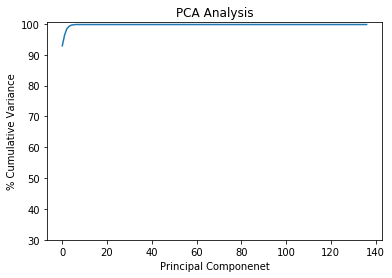

In [114]:
#plot the variance

plt.ylabel('% Cumulative Variance')
plt.xlabel('Principal Componenet')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(variance)

### Random Forest with PCA

Construct a PCA and Random Forest Regressor pipeline. A pipeline is a term for the processing of data until it reaches a form that is usable for the machine learning algorithm. Now there is an actual pipeline module you'll need to use, that streamlines the process of dimension reduction and application of the machine learning algorithm, in this case the random forest regression model. For now, use the first two principal components to construct the pipeline.

In [ ]:
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train) # fit model

In [ ]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

logistic = linear_model.LogisticRegression()
pipeline = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

### Plot the principal components

Select the first two components and display them. As rule of thumb, the first to components are selected as they are easier to display in a 2-dimensions.

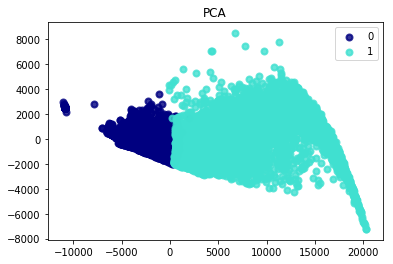

In [96]:
plt.figure()
colors = ['navy', 'turquoise', 'red']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], [0, 1]):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA')

plt.show()

### Split dataset in training and test sets

Split the data into training and test sets and use the pipeline to fit and test the model.

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [102]:
#Fit the model

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [103]:
#predict results

y_pred = pipeline.predict(X_test)

### Evaluate the results

Using the `sklearn.metrics` moduel determine the accuracy score, i.e., the coefficient of determination $R^2$ of the prediction.

In [104]:
# Determine Score
pipeline.score(X_test, y_test)

0.9705333333333334

In [115]:
# F-measure
f1_score(y_test, y_pred, average='micro')

0.9705333333333334

In [105]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[4711,  213],
       [   8, 2568]], dtype=int64)

Text(0.5,15,'Predicted label')

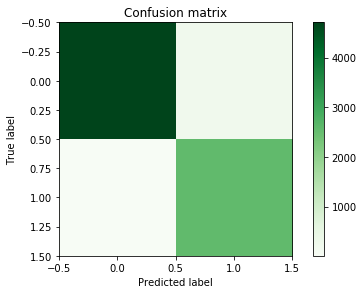

In [116]:
# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion matrix')
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

### References

Referred to for determination of input features to predict power output: [Forecasting Wind Power](https://lucdemortier.github.io/articles/17/WindPower).

[Selecting good features – Part IV: stability selection, RFE and everything side by side](http://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/)